<a href="https://colab.research.google.com/github/Apoorv070/FarmoHelp/blob/master/cotton_disease_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP1 : Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('content/')

Mounted at content/


## Approach 1 : CNN  model

In [ ]:
####IMP LIBRARIES
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
%matplotlib inline 

## STEP-2 PREPROCESSING

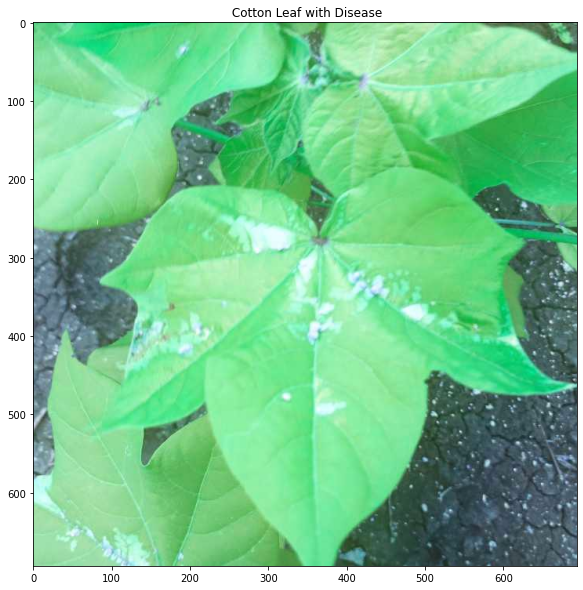

In [ ]:
image = cv2.imread('/content/content/MyDrive/Cotton Disease/train/diseased cotton leaf/dis_leaf (1)_iaip.jpg')
plt.figure(figsize=(10,10)) 
plt.title(' Cotton Leaf with Disease')
plt.imshow(image)

## STEP3 : Making of Data Generator

In [ ]:
train_datagenerator = ImageDataGenerator(rescale = 1.0/255,
                                        shear_range = 0.2,
                                        zoom_range = 0.5,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        width_shift_range=0.2,
                                        brightness_range=[0.2,1.2]
                                        )
test_datagenerator = ImageDataGenerator(rescale = 1.0/255)

In [ ]:
train_data = train_datagenerator.flow_from_directory('/content/content/MyDrive/Cotton Disease/train',
                                                    target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')
test_data = test_datagenerator.flow_from_directory('/content/content/MyDrive/Cotton Disease/test',
                                                  target_size = (256,256),
                                                    batch_size = 32,
                                                    class_mode = 'categorical')

Found 1961 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


## STEP4 : Model formation

In [ ]:
# CNN Model
cnn = tf.keras.models.Sequential()
# Convolution 
cnn.add(tf.keras.layers.Conv2D(filters=64,padding = "same",kernel_size=3,activation='relu',input_shape=[256,256,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,padding = "same",kernel_size=3,activation='relu'))
# pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=16,padding = "same",kernel_size=3,activation='relu'))
#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

#flaterning
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
# Output layer
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
# Compiling the CNN
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = train_data, validation_data = test_data, epochs = 10)

Epoch 1/10
62/62 [==============================] - 1149s 18s/step - loss: 1.3855 - accuracy: 0.3855 - val_loss: 1.2730 - val_accuracy: 0.3302
Epoch 2/10
62/62 [==============================] - 59s 953ms/step - loss: 1.1271 - accuracy: 0.5035 - val_loss: 0.9892 - val_accuracy: 0.5849
Epoch 3/10
62/62 [==============================] - 58s 927ms/step - loss: 1.0178 - accuracy: 0.5542 - val_loss: 1.1314 - val_accuracy: 0.5566
Epoch 4/10
62/62 [==============================] - 58s 926ms/step - loss: 0.9143 - accuracy: 0.6313 - val_loss: 0.8850 - val_accuracy: 0.6698
Epoch 5/10
62/62 [==============================] - 58s 931ms/step - loss: 0.8405 - accuracy: 0.6479 - val_loss: 0.7646 - val_accuracy: 0.7264
Epoch 6/10
62/62 [==============================] - 57s 924ms/step - loss: 0.7421 - accuracy: 0.6956 - val_loss: 0.5973 - val_accuracy: 0.7642
Epoch 7/10
62/62 [==============================] - 57s 916ms/step - loss: 0.7170 - accuracy: 0.7056 - val_loss: 0.6642 - val_accuracy: 0.7736

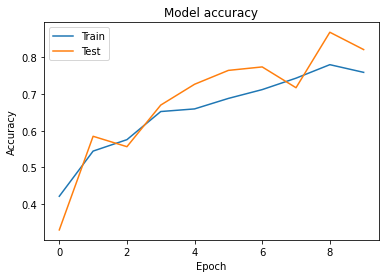

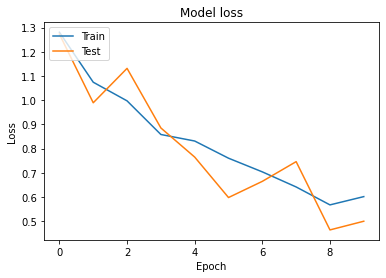

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/My Drive/model_cnn.h5')

## Approcah 2 Transfer learning using VGG16 / Fine Tuning 
https://github.com/keras-team/keras/issues/4040

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
IMAGE_SIZE = [224, 224]
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)#Dont want to select final dense layer

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/content/MyDrive/Cotton Disease/train/*')

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

#create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Compile the Model
model.compile( loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# Fit the model
r = model.fit_generator( training_set,
                         validation_data=test_set,
                        epochs=20,
                        steps_per_epoch=len(training_set),
                         validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 63s 846ms/step - loss: 1.0466 - accuracy: 0.6256 - val_loss: 0.2462 - val_accuracy: 0.9151
Epoch 2/20
62/62 [==============================] - 45s 724ms/step - loss: 0.2306 - accuracy: 0.9139 - val_loss: 0.2119 - val_accuracy: 0.9340
Epoch 3/20
62/62 [==============================] - 45s 730ms/step - loss: 0.1768 - accuracy: 0.9321 - val_loss: 0.1362 - val_accuracy: 0.9434
Epoch 4/20
62/62 [==============================] - 45s 724ms/step - loss: 0.1649 - accuracy: 0.9395 - val_loss: 0.1178 - val_accuracy: 0.9528
Epoch 5/20
62/62 [==============================] - 45s 723ms/step - loss: 0.1162 - accuracy: 0.9580 - val_loss: 0.1366 - val_accuracy: 0.9528
Epoch 6/20
62/62 [==============================] - 45s 728ms/step - loss: 0.0947 - accuracy: 0.9725 - val_loss: 0.1477 - val_accuracy: 0.9151
Epoch 7/20
62/62 [==============================] - 46s 733ms/step - loss: 0.0872 - accuracy: 0.9765 - val_loss: 0.1757 - val_accuracy: 0.9245

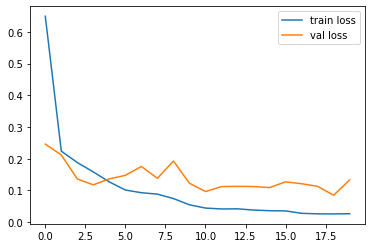

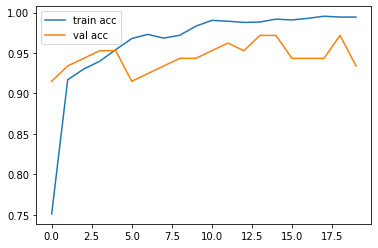

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

## Approach 3  : Transfer Learning Inception V3 using Keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/content/MyDrive/Cotton Disease/train'
valid_path = '/content/content/MyDrive/Cotton Disease/test'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/content/MyDrive/Cotton Disease/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_98 (Conv2D)              (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_98[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 53s 749ms/step - loss: 4.6675 - accuracy: 0.6011 - val_loss: 0.2782 - val_accuracy: 0.9151
Epoch 2/20
62/62 [==============================] - 42s 680ms/step - loss: 0.6989 - accuracy: 0.8749 - val_loss: 0.3626 - val_accuracy: 0.9340
Epoch 3/20
62/62 [==============================] - 42s 679ms/step - loss: 0.4799 - accuracy: 0.9107 - val_loss: 0.4167 - val_accuracy: 0.8962
Epoch 4/20
62/62 [==============================] - 43s 694ms/step - loss: 0.4694 - accuracy: 0.9191 - val_loss: 0.7730 - val_accuracy: 0.8962
Epoch 5/20
62/62 [==============================] - 44s 701ms/step - loss: 0.5744 - accuracy: 0.9105 - val_loss: 0.1855 - val_accuracy: 0.9623
Epoch 6/20
62/62 [==============================] - 43s 700ms/step - loss: 0.5484 - accuracy: 0.9123 - val_loss: 0.7580 - val_accuracy: 0.8585
Epoch 7/20
62/62 [==============================] - 44s 702ms/step - loss: 0.6279 - accuracy: 0.9214 - val_loss: 0.2143 - val_accuracy: 0.9623

In [ ]:

import matplotlib.pyplot as plt


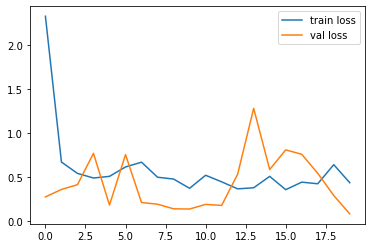

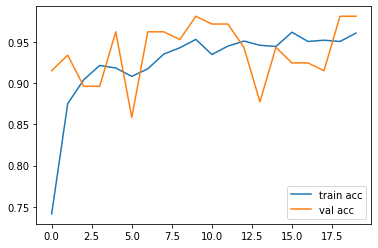

<Figure size 432x288 with 0 Axes>

In [ ]:

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:

from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.40616386e-32, 6.54840278e-26, 1.00000000e+00, 4.02142231e-23],
       [1.00000000e+00, 3.44810742e-11, 1.27343031e-23, 8.20531336e-23],
       [1.86081788e-14, 2.00837126e-20, 1.00000000e+00, 4.50429126e-17],
       [3.07256851e-13, 2.65005986e-31, 1.00000000e+00, 3.85351343e-12],
       [5.55940043e-34, 1.04716888e-13, 4.11675715e-15, 1.00000000e+00],
       [1.48691737e-16, 1.88067574e-35, 1.00000000e+00, 1.11691286e-16],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.52110931e-25, 1.84523997e-16, 2.65946526e-14, 1.00000000e+00],
       [9.99999881e-01, 6.14248200e-27, 1.66311750e-07, 2.17999522e-24],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.09899001e-38, 1.00000000e+00, 2.27652622e-38, 2.83739426e-35],
       [1.00000000e+00, 9.11161717e-35, 4.49793583e-33, 0.00000000e+00],
       [1.00000000e+00, 9.58253993e-27, 1.74884117e

## Aproach 4 : Transfer learning resnet 50

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/content/MyDrive/Cotton Disease/train'
valid_path = '/content/content/MyDrive/Cotton Disease/val'

In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights
import tensorflow
resnet152V2 =tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

234553344/234545216 [==============================] - 2s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet152V2.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/content/content/MyDrive/Cotton Disease/train/*')

In [ ]:

# our layers - you can add more if you want
x = Flatten()(resnet152V2.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet152V2.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/content/MyDrive/Cotton Disease/train/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1961 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 91s 1s/step - loss: 2.4901 - accuracy: 0.7079 - val_loss: 0.6548 - val_accuracy: 0.9087
Epoch 2/20
62/62 [==============================] - 77s 1s/step - loss: 0.5216 - accuracy: 0.9256 - val_loss: 0.3821 - val_accuracy: 0.9398
Epoch 3/20
62/62 [==============================] - 77s 1s/step - loss: 0.4340 - accuracy: 0.9245 - val_loss: 0.1607 - val_accuracy: 0.9740
Epoch 4/20
62/62 [==============================] - 77s 1s/step - loss: 0.2975 - accuracy: 0.9561 - val_loss: 0.1611 - val_accuracy: 0.9730
Epoch 5/20
62/62 [==============================] - 76s 1s/step - loss: 0.3760 - accuracy: 0.9557 - val_loss: 0.2590 - val_accuracy: 0.9567
Epoch 6/20
62/62 [==============================] - 76s 1s/step - loss: 0.2567 - accuracy: 0.9624 - val_loss: 0.2801 - val_accuracy: 0.9587
Epoch 7/20
62/62 [==============================] - 76s 1s/step - loss: 0.2413 - accuracy: 0.9699 - val_loss: 0.3774 - val_accuracy: 0.9510
Epoch 8/20
62/62 [==

In [ ]:
import matplotlib.pyplot as plt

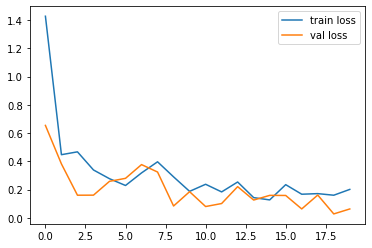

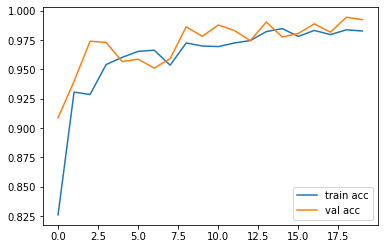

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')